
# Linear Regression Project
## Description:
The goal of this project is to make a data driven decision to determine which is the best for invesment,time on app or time on website based on the data provided 


## Imports


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce_Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [88]:
customers = pd.read_csv("Ecommerce_Customers.csv")

**Checking the head of customers, info() and describe()**

In [89]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [90]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [91]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis



**The plot below show that the more time on app the money spent**

In [92]:
sns.set_palette("rocket")


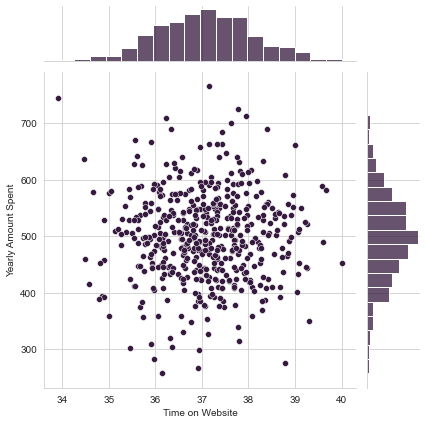

In [93]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

**the plot below show that the the more time on website the more money spent same as time on App**

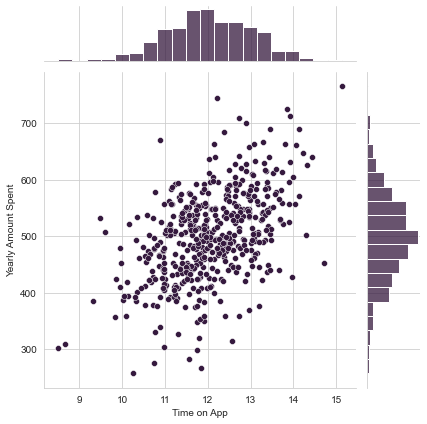

In [94]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Using  jointplot to create a 2D hex bin plot to  compare Time on App and Length of Membership.**

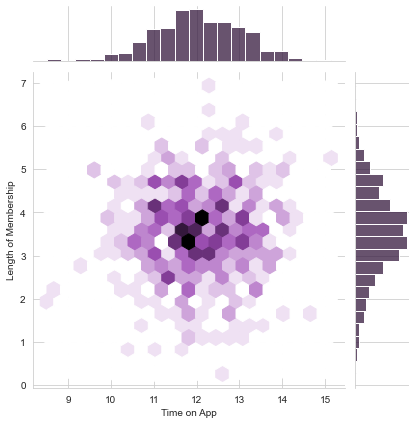

In [95]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Exploring the diffrent Relationships between all data**

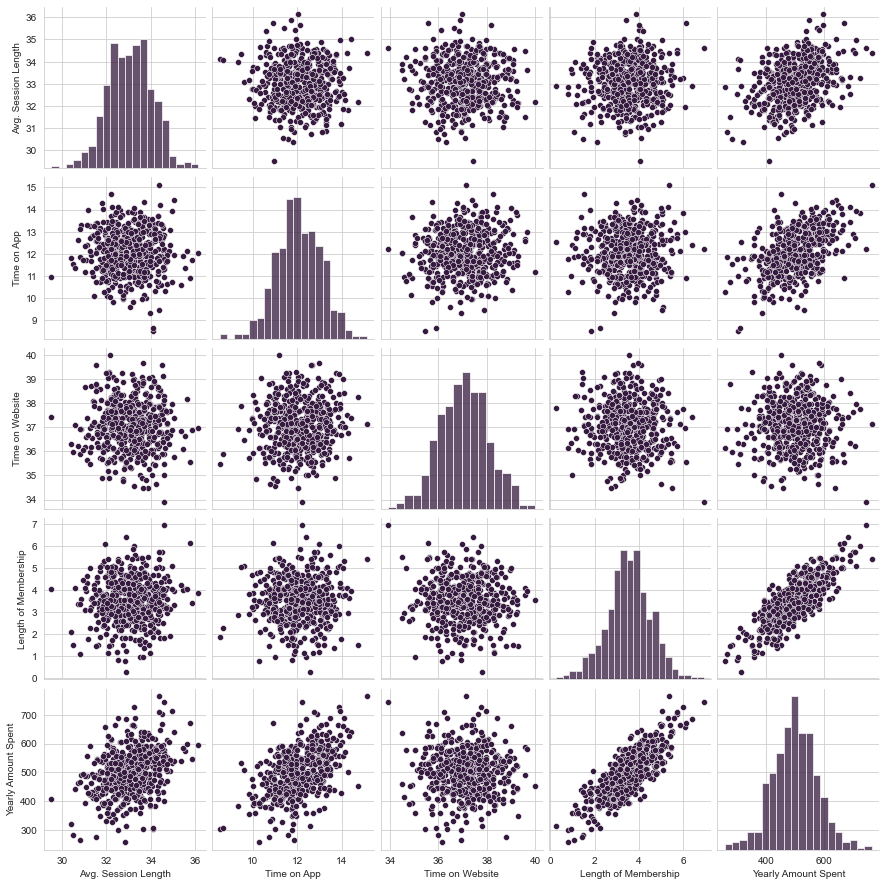

In [96]:
sns.pairplot(customers)

**Based off the above plot the Length of Membership is the most correlated feature with Yearly Amount Spent**

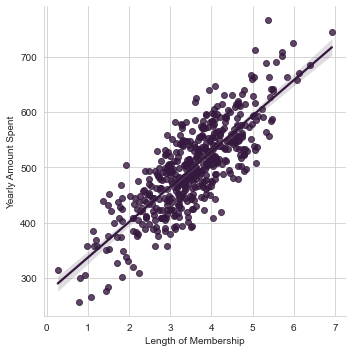

In [97]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data



In [98]:
y = customers['Yearly Amount Spent']

In [99]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model



In [102]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [103]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [104]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [105]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015876  0.19040527 61.27909654]


## Predicting Test Data


In [106]:
predictions = lm.predict( X_test)

**the plot below is a  scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

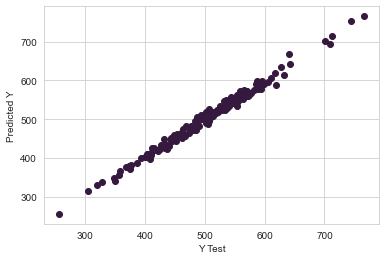

In [107]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model



In [108]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148667775286
MSE: 79.81305181284601
RMSE: 8.93381507603812


## Residuals



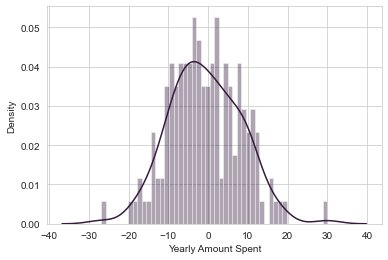

In [109]:
sns.distplot((y_test-predictions),bins=50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? 


In [110]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.


# <span style='color:red'> Based on the Interpertation the time on app holds more value than the time on website  </span>